# pandas学习

## 通过pandas读入数据并处理


In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import pygraphviz as pgv
import matplotlib.pyplot as plt

data = pd.read_csv('/home/tangkun/analyticsvidhya/Airlines.csv')
data.shape
data.dtypes
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' +\
data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + \
data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + \
':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + \
data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
# finally we drop the columns we don't need
data = data.drop(columns = ['year', 'month', 'day'])
data

(100, 16)

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
dtype: object

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,std,sta,atd,ata,date
0,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946,16:30:00,18:37:00,18:07:00,19:56:00,2013-02-26
1,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076,14:45:00,17:47:00,14:59:00,18:01:00,2013-08-17
2,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402,18:15:00,21:25:00,18:12:00,20:55:00,2013-02-13
3,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626,21:15:00,23:53:00,21:22:00,23:39:00,2013-04-11
4,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422,18:35:00,21:55:00,18:32:00,21:45:00,2013-08-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1129.0,1135,-6.0,1414.0,1436,-22.0,DL,1875,N342NB,LGA,TPA,147.0,1010,11:35:00,14:36:00,11:29:00,14:14:00,2013-11-29
96,1029.0,1029,0.0,1300.0,1344,-44.0,UA,1605,N37465,EWR,LAX,308.0,2454,10:29:00,13:44:00,10:29:00,13:00:00,2013-03-10
97,1724.0,1725,-1.0,1828.0,1845,-17.0,AA,256,N3CTAA,JFK,BOS,40.0,187,17:25:00,18:45:00,17:24:00,18:28:00,2013-11-25
98,930.0,929,1.0,1421.0,1426,-5.0,B6,215,N638JB,EWR,SJU,200.0,1608,9:29:00,14:26:00,9:30:00,14:21:00,2013-03-05


### 通过pandas生成自定义网络结构数据


In [2]:
pd.options.display.max_columns = 20
rng = np.random.RandomState(seed=5)
ints = rng.randint(1, 11, size=(3, 2))
a = ["A", "B", "C"]
b = ["D", "A", "E"]
df = pd.DataFrame(ints, columns=["weight", "cost"])
df['source'] = a
df["destnation"] = b 
df[["weight", "cost",'source', "destnation"]] #打印当前数据流
#将生成数据导入nx中，用于构建图
G = nx.from_pandas_edgelist(df,'source', "destnation", ["weight", "cost"])
G["E"]["C"]["weight"]
G["E"]["C"]["cost"]
edges = pd.DataFrame(
    {
        "source": [0, 1, 2],
         "target": [2, 2, 3],
         "weight": [3, 4, 5],
        "color": ["red", "blue", "blue"],
    })
G = nx.from_pandas_edgelist(edges, edge_attr=True)
G[0][2]["color"]

,weight,cost,source,destnation
0,4,7,A,D
1,7,1,B,A
2,10,9,C,E


10

9

'red'

In [3]:
ints

array([[ 4,  7],
       [ 7,  1],
       [10,  9]])

EdgeDataView([(0, 2, 3), (2, 1, 4), (2, 3, 5)])

EdgeDataView([(0, 2, 3), (2, 1, 4), (2, 3, 5)])

你好


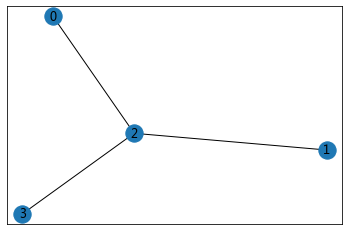

In [4]:
nx.draw_networkx(G)
G.edges.data("weight")
G.edges.data("weight")
print("你好")

# pandasB站

In [5]:
import pandas as pd

t1 = pd.Series([1, 2, 31, 12, 3, 4])
t1
type(t1)

0     1
1     2
2    31
3    12
4     3
5     4
dtype: int64

pandas.core.series.Series

In [13]:
t2 = pd.Series([1, 23, 2, 2, 1], index = list("abcde"))
t2
t2.astype(float)

a     1
b    23
c     2
d     2
e     1
dtype: int64

a     1.0
b    23.0
c     2.0
d     2.0
e     1.0
dtype: float64

In [7]:
#通过字典创建pandas的Series对象
temp_dict = {"name":"xiaohong", "age":30, "tel":10086}

t3 = pd.Series(temp_dict)
t3

name    xiaohong
age           30
tel        10086
dtype: object

In [12]:
import string
a = {string.ascii_uppercase[i]:i for i in range(10)}

a
pd.Series(a)
pd.Series(a, index = list(string.ascii_uppercase[5:15]))

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

A    0
B    1
C    2
D    3
E    4
F    5
G    6
H    7
I    8
J    9
dtype: int64

F    5.0
G    6.0
H    7.0
I    8.0
J    9.0
K    NaN
L    NaN
M    NaN
N    NaN
O    NaN
dtype: float64

## pandas切片和索引操作
1. 参考numpy的切片和索引
2. `pandas`的where方法和ndarray有所不同

In [15]:
t3.index
type(t3.index)
len(t3.index)
list(t3.index)
list(t3.index)[:2]
t3.values
type(t3.values)

Index(['name', 'age', 'tel'], dtype='object')

pandas.core.indexes.base.Index

3

['name', 'age', 'tel']

['name', 'age']

array(['xiaohong', 30, 10086], dtype=object)

numpy.ndarray

# pandas之读取外部数据
1. 如果数据存储在csv中，那么可以用`pd.readcsv()`

In [22]:
df = pd.read_csv('./dogNames2.csv')

df

,Row_Labels,Count_AnimalName
0,1,1
1,2,2
2,40804,1
3,90201,1
4,90203,1
...,...,...
16215,37916,1
16216,38282,1
16217,38583,1
16218,38948,1


In [23]:
from pymongo import MongoClient

client = MongoClient()
collection = client["douban"]["tv1"]

data = list(collection.find())

data

ServerSelectionTimeoutError: localhost:27017: [Errno 111] Connection refused, Timeout: 30s, Topology Description: <TopologyDescription id: 5fbcfb9a4f59f94d38f6dc89, topology_type: Single, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('localhost:27017: [Errno 111] Connection refused')>]>

## pandas的常用数据类型
1. Series 一维，带标签数组
2. DataFrame二维，Series容器

In [37]:
#DataFrame测试代码
pd.DataFrame(np.arange(12).reshape(3, 4))#竖着的是行索引，横着的是列索引
# ?pd.DataFrame
A = pd.DataFrame(np.arange(12).reshape(3, 4), index=list('abc'), columns=list('WXYZ'))#竖着的是行索引，横着的是列索引

A

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


,W,X,Y,Z
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [43]:
d1 = {"name":["xiaohong", "xiaoming"], "age":[28, 20], "tel": [10086, 10000]}

df1 = pd.DataFrame(d1, index= ['person{}'.format(i) for i in 'AB'])

## pandas中DataFrame的属性
1. df.index
2. df.columns
3. df.values

In [49]:
df1.index
df1.columns
df1.values
df1.shape
df1.dtypes
df1.ndim
df1.head(3)#显示几行
df1.tail(1)#显示最后一行
df1.info()
df1.describe()#快速统计当前数据的基本信息

Index(['personA', 'personB'], dtype='object')

Index(['name', 'age', 'tel'], dtype='object')

array([['xiaohong', 28, 10086],
       ['xiaoming', 20, 10000]], dtype=object)

(2, 3)

name    object
age      int64
tel      int64
dtype: object

2

,name,age,tel
personA,xiaohong,28,10086
personB,xiaoming,20,10000


,name,age,tel
personB,xiaoming,20,10000


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, personA to personB
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2 non-null      object
 1   age     2 non-null      int64 
 2   tel     2 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 144.0+ bytes


,age,tel
count,2.000000,2.000000
mean,24.000000,10043.000000
std,5.656854,60.811183
min,20.000000,10000.000000
25%,22.000000,10021.500000
50%,24.000000,10043.000000
75%,26.000000,10064.500000
max,28.000000,10086.000000


### 显示最高频词的狗的名字

In [58]:
df = pd.read_csv('./dogNames2.csv')

# df.describe()
#DataFrame中排序的方法
df = df.sort_values(by = "Count_AnimalName", ascending = False) 
df.head(5) 
type(df[5:10])
df[5:10]["Row_Labels"]

,Row_Labels,Count_AnimalName
1156,BELLA,1195
9140,MAX,1153
2660,CHARLIE,856
3251,COCO,852
12368,ROCKY,823


pandas.core.frame.DataFrame

8417     LOLA
8552    LUCKY
8560     LUCY
2032    BUDDY
3641    DAISY
Name: Row_Labels, dtype: object

## pandas的数据操作
1. 数据排序 pdobj.sort_values(by = "sortCol", ascending = True) #根据给定的coloum进行排序，默认升序排列
2. pandas取行取列，`pdobj[取行]["列索引"]`通过取行数组进行取行操作，列索引取具体的列
3. `pdobj.loc[]`通过标签索引行数据
4. `pdobj.iloc[]`通过位置获取数据
5. `pdobj.dropna(axis = 0, how='all')`删除元素全为`NaN`的行
6. `pdobj.dropna(axis = 0, how = 'any', inplace=True)`删除元素中有`NaN`的行,inplace为True的时候更新原有pdobj
7. `pdobj.fillna(fillvalue)`

In [62]:
A
A.loc[:,'W']
A.iloc[2, 3]
A.iloc[2, 3] = 66
A

,W,X,Y,Z
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


a    0
b    4
c    8
Name: W, dtype: int64

11

,W,X,Y,Z
a,0,1,2,3
b,4,5,6,7
c,8,9,10,66


### pandas的布尔索引
1. 单个条件索引
2. 多个条件索引，通过`()`并使用`&`和`|`进行切片

In [72]:
#索引使用次数超过800的狗的名字
over800_df = df[(df['Count_AnimalName']>800 )&(df['Count_AnimalName']<1000)] #切片操作
over800_df

,Row_Labels,Count_AnimalName
2660,CHARLIE,856
3251,COCO,852
12368,ROCKY,823


In [73]:
#使用次数超过700并且字符串的长度大于4的狗的名字
df[(df["Row_Labels"].str.len()>4)&(df["Count_AnimalName"]>700)]

,Row_Labels,Count_AnimalName
1156,BELLA,1195
2660,CHARLIE,856
12368,ROCKY,823
8552,LUCKY,723


## 缺失数据的处理
1. `isnull()`判断数据是否为`NaN`
2. `fillna()`
3. `dropna()`
pandas中计算

处理为0的数据，t[t==0]=np.nan,在pandas中nan不参与计算，但是0会